# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.20.0


### Creating data to view and fit

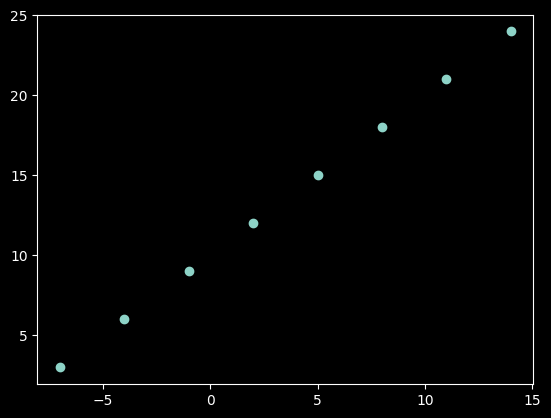

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X = tf.cast(X, dtype= tf.float32)
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
y = tf.cast(y, dtype= tf.float32)

# Visualize it
plt.scatter(X,y)

In [33]:
y == X+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

In [34]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [35]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [36]:
X[1], y[1]


(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [37]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [38]:
X[0].ndim

0

In [39]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [40]:
input_shape = X[0].shape #type:ignore
output_shape = y[0].shape #type:ignore
input_shape, output_shape

(TensorShape([]), TensorShape([]))

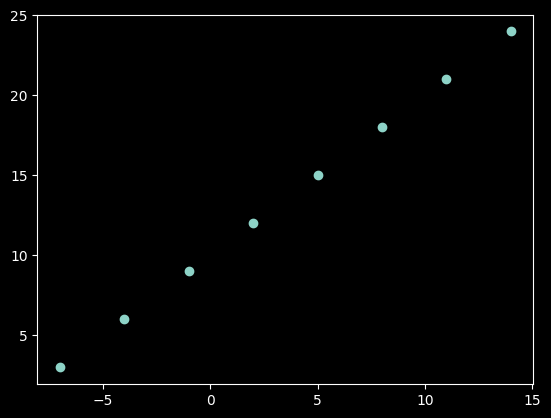

In [41]:
plt.scatter(X,y) #type:ignore

## Steps in modeling with TensorFlow

1. **Creating a model**
    - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**
    - define the loss function (in other words the function which tells our model how wrong it is)
    - define the optimizer (tells our model how to improve the patterns its learning)
    - define the metrics (what we can use to interpret the performance of our model )
3. **Fitting a model**
    - letting the model try to find patterns between X and Y (features and labels)

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae -> mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 14.9854 - mae: 14.9854


In [43]:
# Checkout x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [44]:
# Try and make a prediction using our model
predict = tf.constant([17.0])
y_pred = model.predict(predict)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[-6.6098866]], dtype=float32)

### Improving our model
We can improve our mode, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the numbers of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [45]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.050),
    metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - loss: 13.8394 - mae: 13.8394
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.8287 - mae: 7.8287
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.3424 - mae: 12.3424
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.7864 - mae: 7.7864
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.6582 - mae: 4.6582
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.4979 - mae: 7.4979
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.4970 - mae: 7.4970
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.7990 - mae: 5.7990
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.9205 - mae: 3.9205
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.0277 - mae: 5.0277
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.4284 - mae: 4.4284
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1731 - mae: 3.1731
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33m

In [46]:
#remind ourselves the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [47]:
# Let's see if our model's prediction has improved...
predict = tf.constant([17.0])
model.predict(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[23.907871]], dtype=float32)

In [48]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 13.4168 - mae: 13.4168
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.7508 - mae: 12.7508
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.0846 - mae: 12.0846
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.4131 - mae: 11.4131
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.7337 - mae: 10.7337
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.0431 - mae: 10.0431
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.3385 - mae: 9.3385
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.6167 - mae: 8.6167
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.8751 - mae: 7.8751
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.1111 - mae: 7.1111
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.7309 - mae: 6.7309
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.9917 - mae: 6.9917
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [49]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [50]:
prd = tf.constant([17])
model.predict(prd)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[28.404987]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll through when building neural networks is:


`Build a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it...`



## When it comes evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize,"

### It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does it look like?
* The training of a model - how does a model preform while it learns?
* The predictions of the model - how do the predictions of a model line up against the grand truth (the original labels) ?

In [2]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

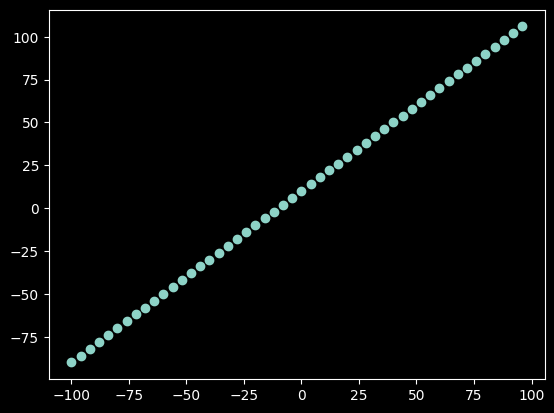

In [131]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets...


* **Training set** - the model learns from this data, which is
typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is
typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test
what is has learned, this set is typically 10-15% of the total
data available.

In [132]:
# Check the length of how many samples we have
len(X)

50

In [4]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data
Now we're got our data in training and test sets... let's visualize it again

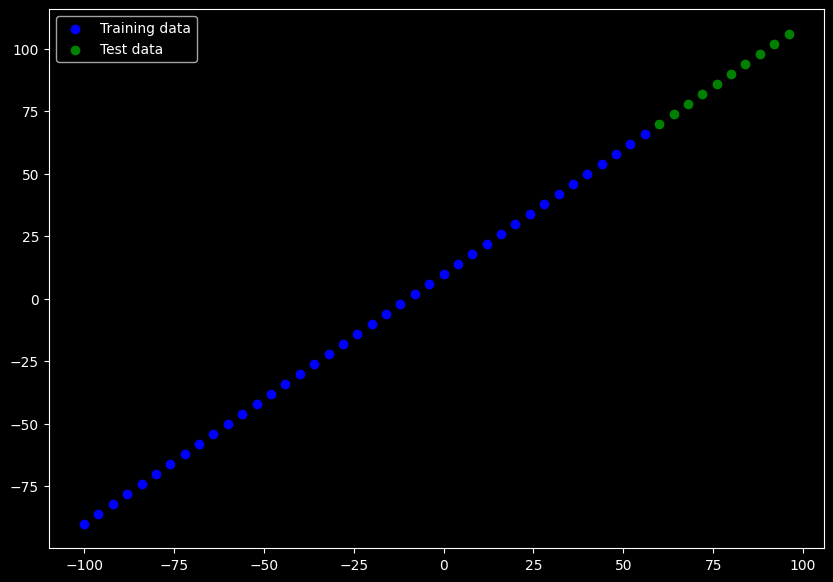

In [7]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label= "Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label= "Test data")
plt.legend()

In [135]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

## Fit the model.
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [136]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [137]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [138]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],
    name="model_1")

# Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [139]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns)
the model can update as it trains.
* Non-trainable params - these parameters aren't updated
during training (this is typical when you bring in already
learn patterns or parameters from other models during
**transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable
parameters within a layer, check out MIT's introduction to
deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [140]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 57.5915 - mae: 57.5915 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.5182 - mae: 18.5182
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.7751 - mae: 10.7751
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8199 - mae: 11.8199
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.8512 - mae: 12.8512
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.8353 - mae: 14.8353
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.9859 - mae: 11.9859
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.9269 - mae: 12.9269
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.2744 - mae: 15.2744
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7566 - mae: 10.7566
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.5952 - mae: 11.5952
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.4802 - mae: 12.4802
Epoch 13/100
2/2 ━━━━━━━

In [141]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

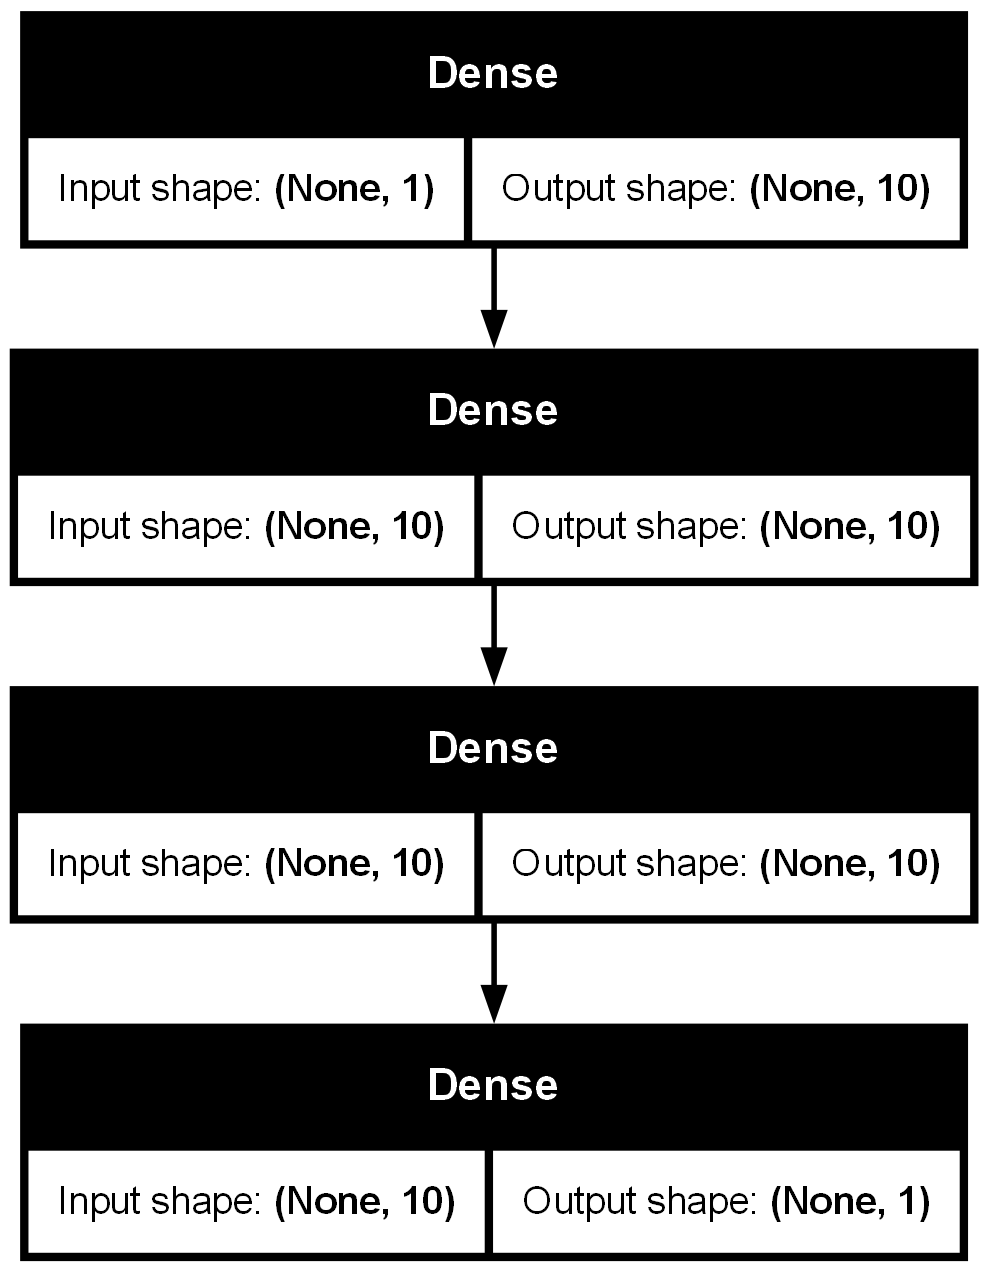

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of "y_test" or "y_true" versus "y_pred" (ground truth versus your model's predictions)

In [143]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[41.45018 ],
       [44.08278 ],
       [46.715378],
       [49.347977],
       [51.980568],
       [54.61317 ],
       [57.24577 ],
       [59.87837 ],
       [62.51096 ],
       [65.14356 ]], dtype=float32)

In [144]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🗝️ **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [8]:
# Let's create a plotting function
y_pred = None
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """
    Plots training data test data and compares predictions to ground truth labels.
    """

    # plot the prediction data in blue
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", label= "Training data")

    # plot the testing data
    plt.scatter(test_data, test_labels, c = "g", label= "Test data")


    #Plot model's predictions in red
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend()


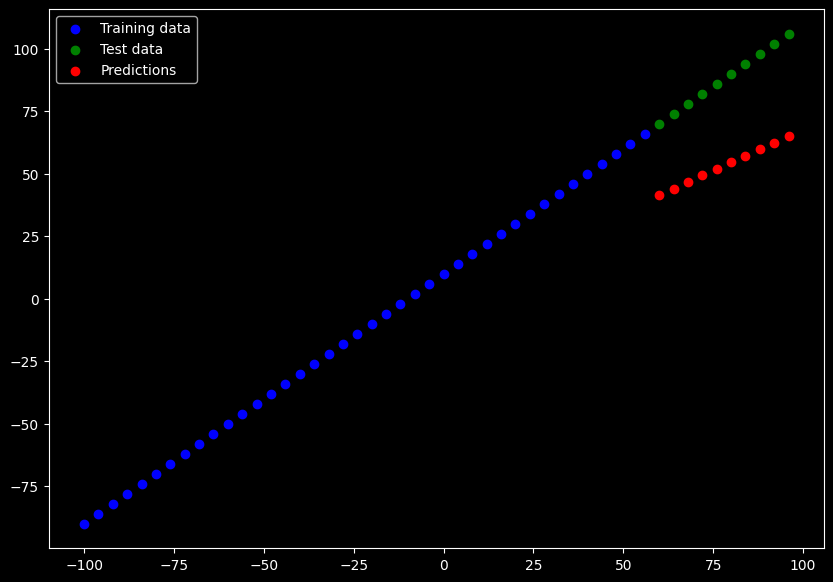

In [146]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### These are my codes to improve predictions

In [6]:
# let's create a better model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])


model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9498 - mae: 2.9498
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9378 - mae: 2.9378
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9262 - mae: 2.9262
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9184 - mae: 2.9184
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9376 - mae: 2.9376
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9391 - mae: 2.9391
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9408 - mae: 2.9408
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9148 - mae: 2.9148
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9069 - mae: 2.9069
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9168 - mae: 2.9168
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8733 - mae: 2.8733
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8607 - mae: 2.8607
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/ste

In [11]:
y_pred = model.predict(y_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[ 84.51524 ],
       [ 89.087166],
       [ 93.659065],
       [ 98.23019 ],
       [102.799965],
       [107.36974 ],
       [111.93952 ],
       [116.5093  ],
       [121.07909 ],
       [125.64887 ]], dtype=float32)

In [12]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

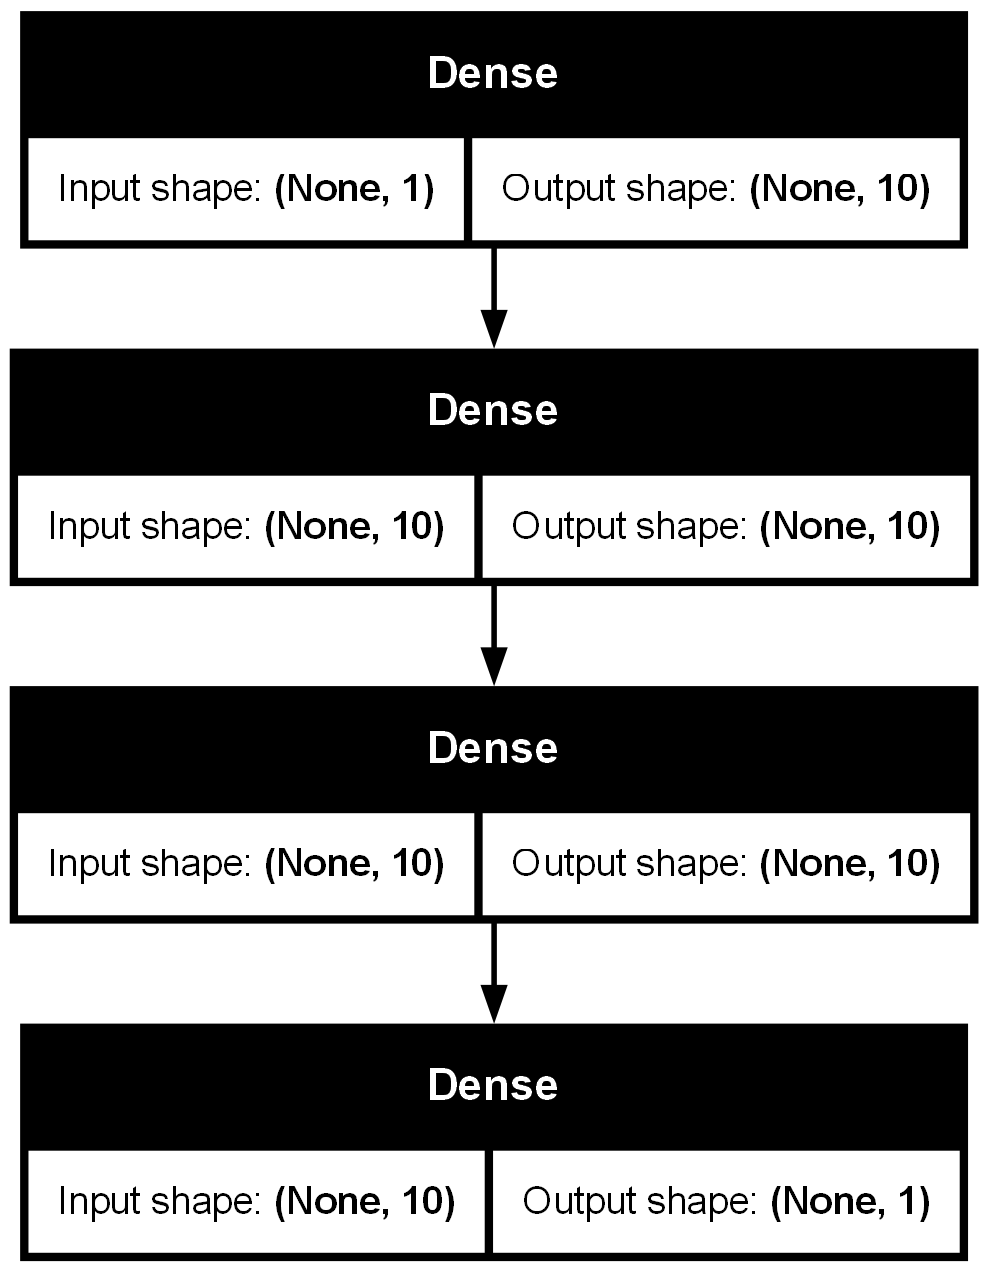

In [17]:
plot_model(model, show_shapes=1)

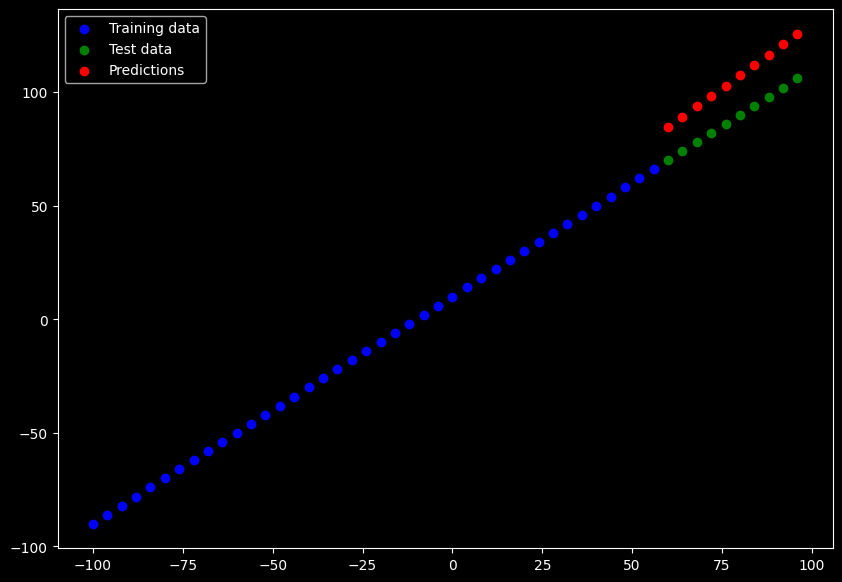

In [24]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our models predictions with regression evaluation metrics

Alongside visualizations, evaluation metrics are your alternative best option for evaluating your model.
Depending on the problem you're working on, different models have different evaluation metrics.
Two of the main metrics used for regression problems are:
- **Mean absolute error (MAE)** - the mean difference between each of the predictions.
- **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [23]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 5.6567 - mae: 5.6567


[5.656671047210693, 5.656671047210693]

In [ ]:
# Calculate the mean squared error

In [28]:
tf.keras.metrics.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=294.53973388671875>

In [13]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return tf.keras.metrics.MSE(y_true, tf.squeeze(y_pred))

`Build a model` -> `fit it -> evaluate it -> tweak it` -> `fit it -> evaluate it -> tweak it` -> `fit it -> evaluate it ...`

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and
labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs


**Build `model_1`**

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# Compile the model
model_1.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
X_train_expanded = tf.expand_dims(X_train, axis=-1)
model_1.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.6513 - mae: 19.6513 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0272 - mae: 10.0272
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.4493 - mae: 8.4493
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1381 - mae: 9.1381
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.1359 - mae: 8.1359
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7638 - mae: 9.7638
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1172 - mae: 8.1172
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7509 - mae: 9.7509
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0985 - mae: 8.0985
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7379 - mae: 9.7379
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.0799 - mae: 8.0799
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7250 - mae: 9.7250
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


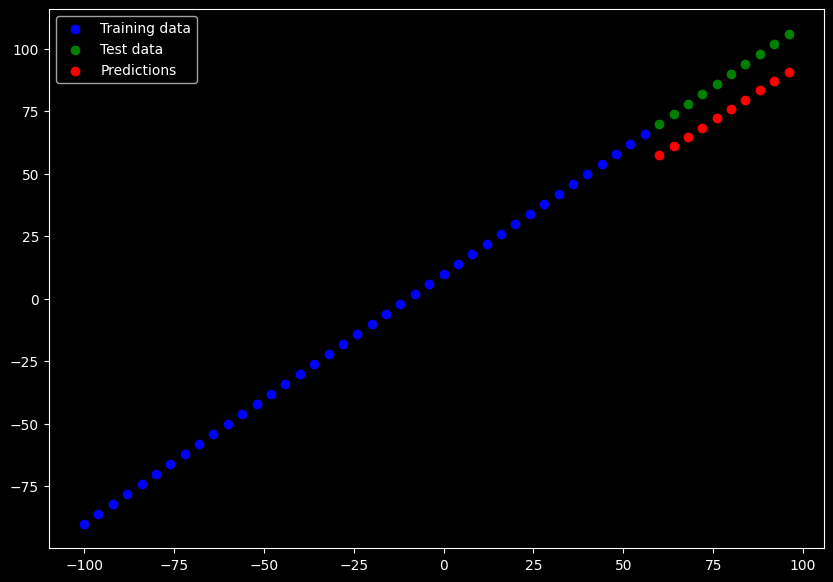

In [11]:
# Make and plot the predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions= y_pred_1)

In [14]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=int32, numpy=17>,
 <tf.Tensor: shape=(), dtype=float32, numpy=194.44882202148438>)

**Build `mdoel_2`** with **your own codes**
- 2 dense layers, trained for 100 epochs

In [41]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["mae"])

model_2.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 38.7315 - mae: 38.7315 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.2572 - mae: 38.2572
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.7836 - mae: 37.7836
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.3100 - mae: 37.3100
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.8363 - mae: 36.8363
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.3627 - mae: 36.3627
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 35.8889 - mae: 35.8889
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.4151 - mae: 35.4151
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34.9411 - mae: 34.9411
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34.4669 - mae: 34.4669
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.9926 - mae: 33.9926
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.5246 - mae: 33.5246
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


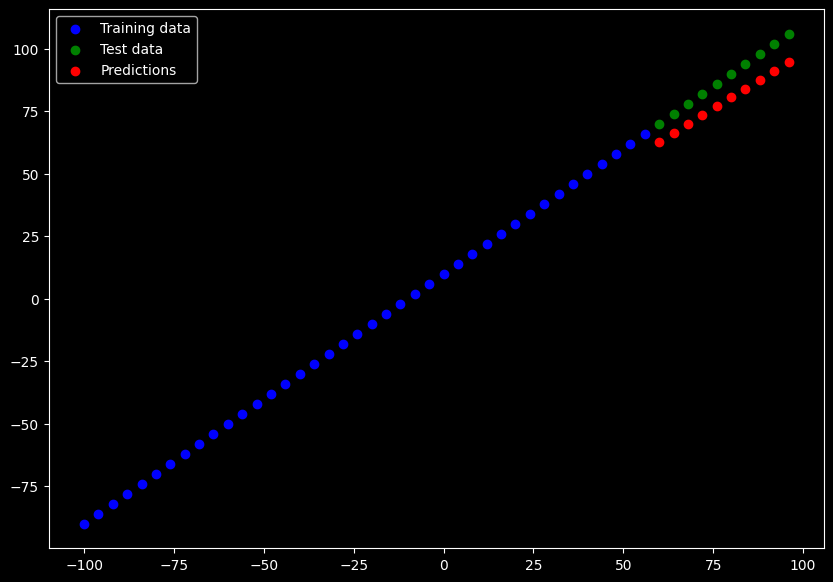

In [43]:
y_pred_2 = model_2.predict(y_test)
plot_predictions(predictions = y_pred_2)

In [44]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2 # My code result

(<tf.Tensor: shape=(), dtype=int32, numpy=14>,
 <tf.Tensor: shape=(), dtype=float32, numpy=87.19410705566406>)

**Build `mdoel_2`** with **course codes**
- 2 dense layers, trained for 100 epochs

In [62]:
tf.random.set_seed(42)

model_2_c = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_2_c.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ["mse"])

model_2_c.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 37.3079 - mse: 2034.3776 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.7497 - mse: 1116.3691
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.4765 - mse: 763.4664
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.5283 - mse: 694.7811
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.3288 - mse: 365.0746
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.5849 - mse: 463.5816
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.7389 - mse: 285.0807
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.3734 - mse: 330.0028
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.9388 - mse: 343.0368
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.4863 - mse: 241.4778
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.0762 - mse: 314.4738
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.5940 - mse: 216.8394
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


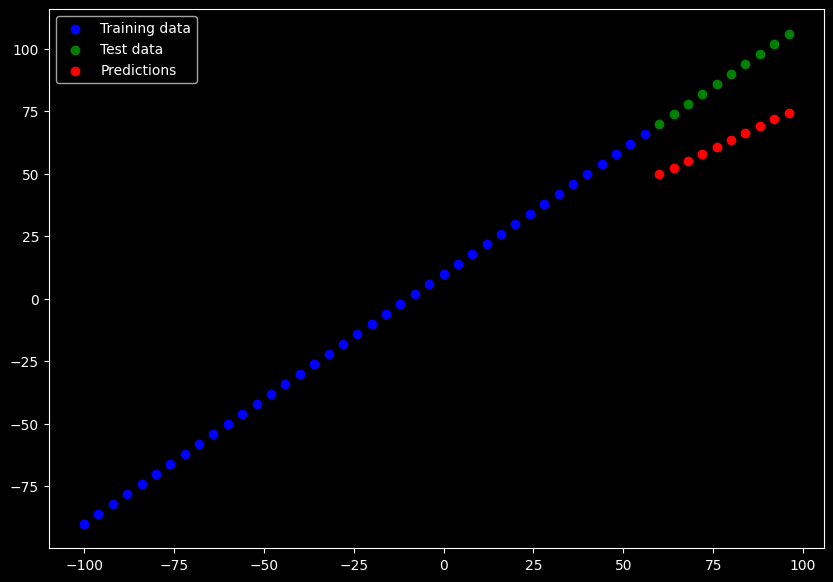

In [63]:
# Make and plot predictions of
y_pred_2_c = model_2_c.predict(y_test)
plot_predictions(predictions = y_pred_2_c)


In [64]:
# Calculate model_2 evaluation metrics
mae_2_c = mae(y_test, y_pred_2_c)
mse_2_c = mse(y_test, y_pred_2_c)
mae_2_c, mse_2_c # course code result

(<tf.Tensor: shape=(), dtype=int32, numpy=26>,
 <tf.Tensor: shape=(), dtype=float32, numpy=683.1318969726562>)

**build `model_3`**
* 2 layers, trained for 500 epochs

In [66]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ["mae"])

model_3.fit(X_train_expanded, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 48.9762 - mae: 48.9762 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.7127 - mae: 25.7127
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.4868 - mae: 23.4868
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.9601 - mae: 19.9601
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.1848 - mae: 18.1848
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.8067 - mae: 12.8067
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.2010 - mae: 15.2010
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.6131 - mae: 15.6131
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.1461 - mae: 12.1461
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.4876 - mae: 14.4876
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.5288 - mae: 11.5288
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.8759 - mae: 14.8759
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


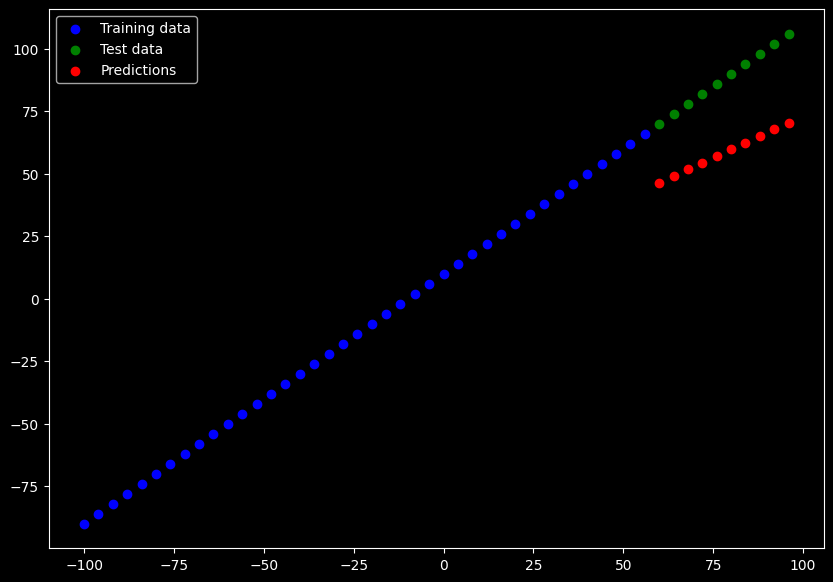

In [67]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions= y_pred_3)

In [70]:
# Calculate model 3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=int32, numpy=30>,
 <tf.Tensor: shape=(), dtype=float32, numpy=886.5640869140625>)